In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import pickle

In [ ]:
pd.pandas.set_option('display.max_columns',None)
data = pd.read_excel("Dataset - AQI.xlsx")
data

,StationId,StationName,City,State,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,date,time
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,104.00,148.50,1.93,23.00,13.75,9.80,0.10,15.30,117.62,0.30,10.40,0.23,155,Moderate,2017-11-25,09:00:00
1,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,94.50,142.00,1.33,16.25,9.75,9.65,0.10,17.00,136.23,0.28,7.10,0.15,159,Moderate,2017-11-25,10:00:00
2,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,82.75,126.50,1.47,14.83,9.07,9.70,0.10,15.40,149.92,0.20,4.55,0.08,173,Moderate,2017-11-25,11:00:00
3,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,79.00,124.00,5.30,21.15,15.53,9.40,0.10,14.21,156.80,0.20,4.00,0.00,184,Moderate,2017-11-25,12:00:00
4,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,68.50,117.00,1.35,13.60,8.35,7.40,0.10,21.80,161.70,0.10,2.30,0.00,191,Moderate,2017-11-25,14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60466,BR007,"IGSC Planetarium Complex, Patna - BSPCB",Patna,Bihar,68.00,125.23,14.01,41.35,55.36,15.74,1.48,3.44,31.88,0.30,1.17,0.97,374,Very Poor,2016-01-11,16:00:00
60467,BR007,"IGSC Planetarium Complex, Patna - BSPCB",Patna,Bihar,74.00,125.23,22.12,43.35,65.47,15.74,1.84,2.99,18.62,0.34,1.38,1.11,375,Very Poor,2016-01-11,17:00:00
60468,BR007,"IGSC Planetarium Complex, Patna - BSPCB",Patna,Bihar,108.00,125.23,41.07,43.19,84.26,15.74,3.04,3.45,8.79,0.45,1.94,1.69,376,Very Poor,2016-01-11,18:00:00
60469,BR007,"IGSC Planetarium Complex, Patna - BSPCB",Patna,Bihar,157.00,125.23,76.78,43.95,120.73,15.74,4.96,3.74,8.27,0.72,2.94,2.68,377,Very Poor,2016-01-11,19:00:00


In [ ]:
data.shape

(60471, 20)

In [ ]:
data.head()

,StationId,StationName,City,State,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,date,time
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,104.00,148.5,1.93,23.00,13.75,9.80,0.1,15.30,117.62,0.30,10.40,0.23,155,Moderate,2017-11-25,09:00:00
1,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,94.50,142.0,1.33,16.25,9.75,9.65,0.1,17.00,136.23,0.28,7.10,0.15,159,Moderate,2017-11-25,10:00:00
2,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,82.75,126.5,1.47,14.83,9.07,9.70,0.1,15.40,149.92,0.20,4.55,0.08,173,Moderate,2017-11-25,11:00:00
3,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,79.00,124.0,5.30,21.15,15.53,9.40,0.1,14.21,156.80,0.20,4.00,0.00,184,Moderate,2017-11-25,12:00:00
4,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,68.50,117.0,1.35,13.60,8.35,7.40,0.1,21.80,161.70,0.10,2.30,0.00,191,Moderate,2017-11-25,14:00:00


In [ ]:
data.isnull().count()

StationId      60471
StationName    60471
City           60471
State          60471
PM2.5          60471
PM10           60471
NO             60471
NO2            60471
NOx            60471
NH3            60471
CO             60471
SO2            60471
O3             60471
Benzene        60471
Toluene        60471
Xylene         60471
AQI            60471
AQI_Bucket     60471
date           60471
time           60471
dtype: int64

In [ ]:
data.columns

Index(['StationId', 'StationName', 'City', 'State', 'PM2.5', 'PM10', 'NO',
       'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene',
       'AQI', 'AQI_Bucket', 'date', 'time'],
      dtype='object')

In [ ]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,60471.000000,60471.000000,60471.000000,60471.000000,60471.000000,60471.000000,60471.000000,60471.000000,60471.000000,60471.000000,60471.000000,60471.000000,60471.000000
mean,53.658893,101.282358,15.246564,27.241599,29.575257,11.907476,0.792136,12.924424,33.610688,2.771882,5.943133,2.010878,123.099453
std,56.127236,85.786317,28.903090,23.873188,38.239205,7.747990,0.776567,11.446304,29.762985,9.268793,6.751807,3.687249,87.085472
min,0.060000,0.010000,0.010000,0.100000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,16.000000
25%,21.000000,49.250000,2.000000,10.330000,9.000000,7.250000,0.420000,6.600000,13.575000,0.100000,1.270000,0.440000,66.000000
50%,39.500000,87.000000,4.230000,20.050000,16.200000,11.290000,0.640000,11.170000,23.200000,1.000000,5.550000,1.050000,101.000000
75%,68.000000,125.230000,13.000000,36.640000,33.220000,15.740000,0.950000,15.460000,45.650000,3.750000,7.180000,2.010878,145.000000
max,983.000000,1000.000000,471.240000,266.730000,477.760000,314.800000,21.470000,195.000000,199.920000,491.510000,305.300000,274.800000,1109.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60471 entries, 0 to 60470
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   StationId    60471 non-null  object        
 1   StationName  60471 non-null  object        
 2   City         60471 non-null  object        
 3   State        60471 non-null  object        
 4   PM2.5        60471 non-null  float64       
 5   PM10         60471 non-null  float64       
 6   NO           60471 non-null  float64       
 7   NO2          60471 non-null  float64       
 8   NOx          60471 non-null  float64       
 9   NH3          60471 non-null  float64       
 10  CO           60471 non-null  float64       
 11  SO2          60471 non-null  float64       
 12  O3           60471 non-null  float64       
 13  Benzene      60471 non-null  float64       
 14  Toluene      60471 non-null  float64       
 15  Xylene       60471 non-null  float64       
 16  AQI 

In [ ]:
data.dtypes

StationId              object
StationName            object
City                   object
State                  object
PM2.5                 float64
PM10                  float64
NO                    float64
NO2                   float64
NOx                   float64
NH3                   float64
CO                    float64
SO2                   float64
O3                    float64
Benzene               float64
Toluene               float64
Xylene                float64
AQI                     int64
AQI_Bucket             object
date           datetime64[ns]
time                   object
dtype: object

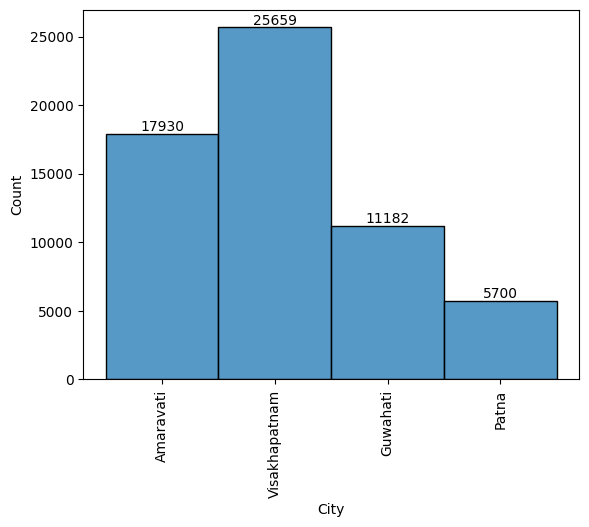

In [ ]:
ax = sns.histplot(data, x = "City")
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 90)
plt.show()

The above graph shows data of 4 cities and the value at the top represents the total data count for different years.

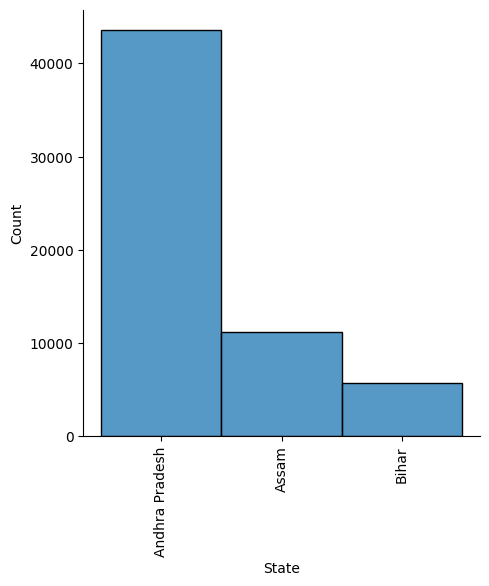

In [ ]:
sns.displot(data, x = "State")
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 90)
plt.show()

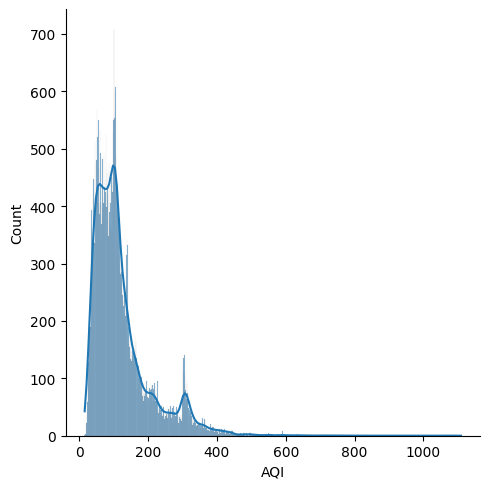

In [ ]:
sns.displot(data, x = "AQI", kde = True, discrete = True)
plt.show()

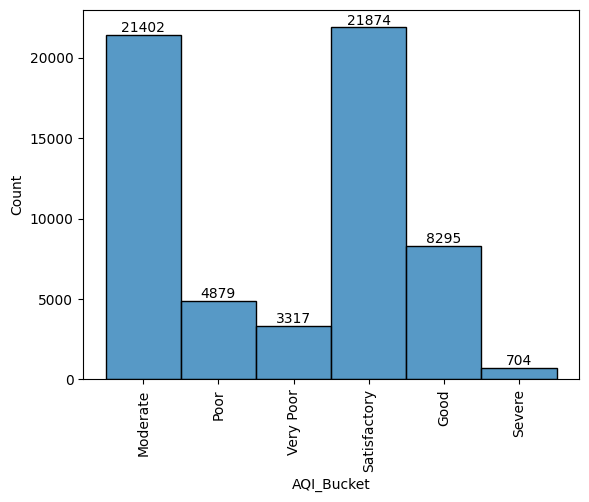

In [ ]:
ax = sns.histplot(data, x = "AQI_Bucket")
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 90)
plt.show()

From the above graph, we can say that most number of air quality measures has not provided any unit compared to the other two unit. The data pertains to 1999 - 2013

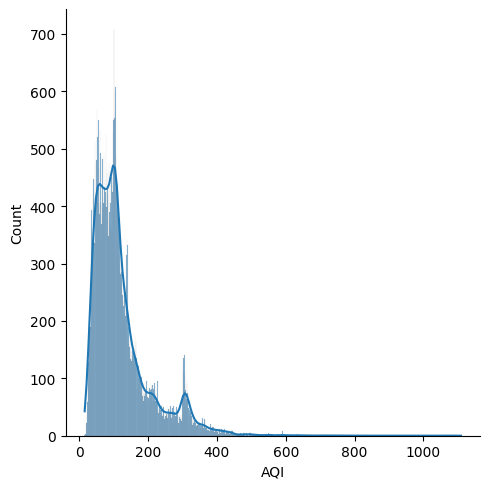

In [ ]:
sns.displot(data, x = "AQI", discrete = True, kde = True)
plt.show()

<ipython-input-15-1dc0764e5414>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix=data.corr()


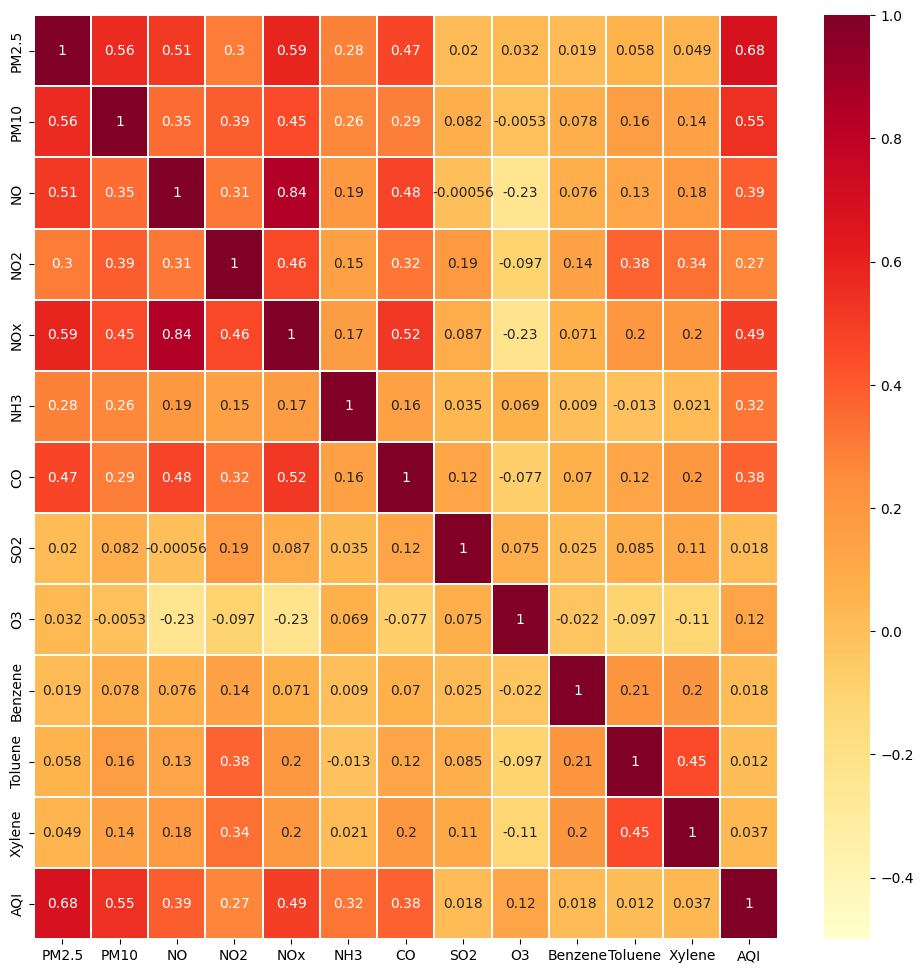

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmatrix,annot=True,vmin=-0.5,vmax=1,linewidth=0.2,cmap='YlOrRd')
plt.show()

In [ ]:
data.describe(include="object").T

,count,unique,top,freq
StationId,60471,6,AP005,25659
StationName,60471,6,"GVM Corporation, Visakhapatnam - APPCB",25659
City,60471,4,Visakhapatnam,25659
State,60471,3,Andhra Pradesh,43589
AQI_Bucket,60471,6,Satisfactory,21874
time,60471,24,11:00:00,2552


In [ ]:
data.AQI_Bucket.value_counts()

Satisfactory    21874
Moderate        21402
Good             8295
Poor             4879
Very Poor        3317
Severe            704
Name: AQI_Bucket, dtype: int64

In [ ]:
data.City.value_counts()

Visakhapatnam    25659
Amaravati        17930
Guwahati         11182
Patna             5700
Name: City, dtype: int64

In [ ]:
data.State.value_counts()

Andhra Pradesh    43589
Assam             11182
Bihar              5700
Name: State, dtype: int64

In [ ]:
data.StationName.value_counts()

GVM Corporation, Visakhapatnam - APPCB        25659
Secretariat, Amaravati - APPCB                17930
Railway Colony, Guwahati - APCB               11182
Govt. High School Shikarpur, Patna - BSPCB     2422
DRM Office Danapur, Patna - BSPCB              1646
IGSC Planetarium Complex, Patna - BSPCB        1632
Name: StationName, dtype: int64

In [ ]:
avg_readings = data.groupby('City').mean().reset_index().round(2)
avg_readings

<ipython-input-21-8888d740946b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_readings = data.groupby('City').mean().reset_index().round(2)


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Amaravati,39.20,77.36,4.41,22.00,15.25,12.19,0.61,14.21,37.51,0.57,1.93,0.44,96.04
1,Guwahati,62.40,113.28,20.35,13.75,44.88,10.92,0.74,14.64,25.22,2.49,5.94,2.01,140.19
2,Patna,105.96,125.23,49.44,24.35,44.62,15.74,1.15,6.22,17.38,2.47,2.20,1.70,197.16
3,Visakhapatnam,48.33,107.45,13.00,37.42,29.57,11.29,0.86,12.77,38.15,4.50,9.58,3.18,118.11


In [ ]:
trace1=go.Pie(labels=avg_readings['City'], values=avg_readings['PM2.5'].round(2),
title='Average PM2.5 readings by City')
fig=go.Figure(trace1)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [ ]:
trace2=go.Pie(labels=avg_readings['City'], values=avg_readings['PM10'].round(2),
             title='Average PM10 readings by City')
fig=go.Figure(trace2)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [ ]:
trace3=go.Pie(labels=avg_readings['City'], values=avg_readings['NO'].round(2),
             title='Average NO readings by City')
fig=go.Figure(trace3)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [ ]:
trace4=go.Pie(labels=avg_readings['City'], values=avg_readings['NO2'],
             title='Average NO2 readings by City')
fig=go.Figure(trace4)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [ ]:
trace4=go.Pie(labels=avg_readings['City'], values=avg_readings['NO2'],
             title='Average NOx readings by City')
fig=go.Figure(trace4)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [ ]:
trace6=go.Pie(labels=avg_readings['City'], values=avg_readings['NH3'],
             title='Average NH3 readings by City')
fig=go.Figure(trace6)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

In [ ]:
trace6=go.Pie(labels=avg_readings['City'], values=avg_readings['NH3'],
             title='Average CO readings by City')
fig=go.Figure(trace6)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

In [ ]:
trace6=go.Pie(labels=avg_readings['City'], values=avg_readings['NH3'],
             title='Average SO2 readings by City')
fig=go.Figure(trace6)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

In [ ]:
trace9=go.Pie(labels=avg_readings['City'], values=avg_readings['O3'],
             title='Average O3 readings by City')
fig=go.Figure(trace9)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

In [ ]:
trace9=go.Pie(labels=avg_readings['City'], values=avg_readings['O3'],
             title='Average Benzene readings by City')
fig=go.Figure(trace9)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

In [ ]:
trace9=go.Pie(labels=avg_readings['City'], values=avg_readings['O3'],
             title='Average Xylene readings by City')
fig=go.Figure(trace9)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

In [ ]:
trace9=go.Pie(labels=avg_readings['City'], values=avg_readings['O3'],
             title='Average Toluene readings by City')
fig=go.Figure(trace9)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

In [ ]:
trace13=go.Pie(labels=avg_readings['City'], values=avg_readings['AQI'],
             title='Average AQI readings by City')
fig=go.Figure(trace13)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

Splitting Dataset into Categorical and Numerical

In [ ]:
num_data = data.select_dtypes(include = ['int64','float64','datetime64[ns]'])
num_data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,date
0,104.00,148.50,1.93,23.00,13.75,9.80,0.10,15.30,117.62,0.30,10.40,0.23,155,2017-11-25
1,94.50,142.00,1.33,16.25,9.75,9.65,0.10,17.00,136.23,0.28,7.10,0.15,159,2017-11-25
2,82.75,126.50,1.47,14.83,9.07,9.70,0.10,15.40,149.92,0.20,4.55,0.08,173,2017-11-25
3,79.00,124.00,5.30,21.15,15.53,9.40,0.10,14.21,156.80,0.20,4.00,0.00,184,2017-11-25
4,68.50,117.00,1.35,13.60,8.35,7.40,0.10,21.80,161.70,0.10,2.30,0.00,191,2017-11-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60466,68.00,125.23,14.01,41.35,55.36,15.74,1.48,3.44,31.88,0.30,1.17,0.97,374,2016-01-11
60467,74.00,125.23,22.12,43.35,65.47,15.74,1.84,2.99,18.62,0.34,1.38,1.11,375,2016-01-11
60468,108.00,125.23,41.07,43.19,84.26,15.74,3.04,3.45,8.79,0.45,1.94,1.69,376,2016-01-11
60469,157.00,125.23,76.78,43.95,120.73,15.74,4.96,3.74,8.27,0.72,2.94,2.68,377,2016-01-11


In [ ]:
cat_data = data.select_dtypes(include = ['object'])
cat_data

,StationId,StationName,City,State,AQI_Bucket,time
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Moderate,09:00:00
1,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Moderate,10:00:00
2,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Moderate,11:00:00
3,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Moderate,12:00:00
4,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Moderate,14:00:00
...,...,...,...,...,...,...
60466,BR007,"IGSC Planetarium Complex, Patna - BSPCB",Patna,Bihar,Very Poor,16:00:00
60467,BR007,"IGSC Planetarium Complex, Patna - BSPCB",Patna,Bihar,Very Poor,17:00:00
60468,BR007,"IGSC Planetarium Complex, Patna - BSPCB",Patna,Bihar,Very Poor,18:00:00
60469,BR007,"IGSC Planetarium Complex, Patna - BSPCB",Patna,Bihar,Very Poor,19:00:00


Data Preprocessing

Label Encoding - Convert all categorical value into numerical.

In [ ]:
org_data=data.copy()

In [ ]:
le=LabelEncoder()

data['StationId']= le.fit_transform(data['StationId'])
data['StationName']= le.fit_transform(data['StationName'])
data['City']= le.fit_transform(data['City'])
data['State']= le.fit_transform(data['State'])
data['AQI_Bucket']= le.fit_transform(data['AQI_Bucket'])
data['time']= le.fit_transform(data['time'])
data

,StationId,StationName,City,State,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,date,time
0,0,5,0,0,104.00,148.50,1.93,23.00,13.75,9.80,0.10,15.30,117.62,0.30,10.40,0.23,155,1,2017-11-25,9
1,0,5,0,0,94.50,142.00,1.33,16.25,9.75,9.65,0.10,17.00,136.23,0.28,7.10,0.15,159,1,2017-11-25,10
2,0,5,0,0,82.75,126.50,1.47,14.83,9.07,9.70,0.10,15.40,149.92,0.20,4.55,0.08,173,1,2017-11-25,11
3,0,5,0,0,79.00,124.00,5.30,21.15,15.53,9.40,0.10,14.21,156.80,0.20,4.00,0.00,184,1,2017-11-25,12
4,0,5,0,0,68.50,117.00,1.35,13.60,8.35,7.40,0.10,21.80,161.70,0.10,2.30,0.00,191,1,2017-11-25,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60466,5,3,2,2,68.00,125.23,14.01,41.35,55.36,15.74,1.48,3.44,31.88,0.30,1.17,0.97,374,5,2016-01-11,16
60467,5,3,2,2,74.00,125.23,22.12,43.35,65.47,15.74,1.84,2.99,18.62,0.34,1.38,1.11,375,5,2016-01-11,17
60468,5,3,2,2,108.00,125.23,41.07,43.19,84.26,15.74,3.04,3.45,8.79,0.45,1.94,1.69,376,5,2016-01-11,18
60469,5,3,2,2,157.00,125.23,76.78,43.95,120.73,15.74,4.96,3.74,8.27,0.72,2.94,2.68,377,5,2016-01-11,19


In [ ]:
org_data2=data

In [ ]:
encoded_data_types = data.dtypes
print(encoded_data_types)

StationId               int64
StationName             int64
City                    int64
State                   int64
PM2.5                 float64
PM10                  float64
NO                    float64
NO2                   float64
NOx                   float64
NH3                   float64
CO                    float64
SO2                   float64
O3                    float64
Benzene               float64
Toluene               float64
Xylene                float64
AQI                     int64
AQI_Bucket              int64
date           datetime64[ns]
time                    int64
dtype: object


Outlier Detection using BOXPLOT

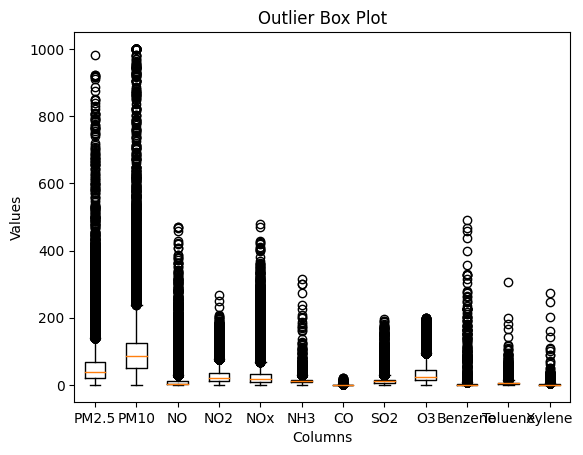

In [ ]:
# Specify the numerical columns to check for outliers
columns_to_check = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Create a figure and axes
fig, ax = plt.subplots()

# Create the box plot for each column
boxplot = ax.boxplot(data[columns_to_check].values, labels=columns_to_check, showfliers=True)

# Add a title and labels to the plot
ax.set_title('Outlier Box Plot')
ax.set_xlabel('Columns')
ax.set_ylabel('Values')

# Show the plot
plt.show()

Outlier removal using Log Transformation

In [ ]:
data = np.random.normal(loc=10, scale=5, size=100)
data = [x for x in data if x > 0]
log_data = np.log(np.array(data) + 1e-10)
log_data = np.log(data)
q1, q3 = np.percentile(log_data, [25, 75])
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
outliers = np.where((log_data > upper_bound) | (log_data < lower_bound))[0]
cleaned_data = np.delete(data, outliers)
print(f"Original data: {data}")
print(f"Cleaned data: {cleaned_data}")

Original data: [4.474012798788509, 16.152317918403266, 1.1126879419272857, 13.366210449824372, 8.770735752166498, 14.932613737718558, 7.2045667340727935, 18.795763483370067, 9.871299205717316, 9.347996480868641, 7.386249359145422, 12.653878163611118, 13.58504295096581, 8.736232282768313, 11.408220630937901, 2.1070439980996527, 6.11797781111344, 16.680637572340366, 12.231420851942215, 6.065660331160276, 4.087740413747538, 10.689876761128978, 6.437603874482898, 12.535760731045183, 14.54688352293393, 2.4388592118325017, 13.17032387477674, 11.639400497640063, 17.3863179339799, 10.224482859572786, 16.297401287698698, 13.005079146176442, 6.3739900146544635, 9.92530486068442, 10.607288881508772, 7.90924354367102, 9.977293490856463, 6.660517982037792, 6.771827647529726, 4.568188466157538, 4.146617886641044, 13.627601047733862, 13.216671314412958, 10.732084309281872, 9.582836532139131, 10.534207657144231, 13.345834874710564, 7.357119532981736, 13.96405873434537, 7.768780230903058, 12.1201362992

In [ ]:
type(data)

list

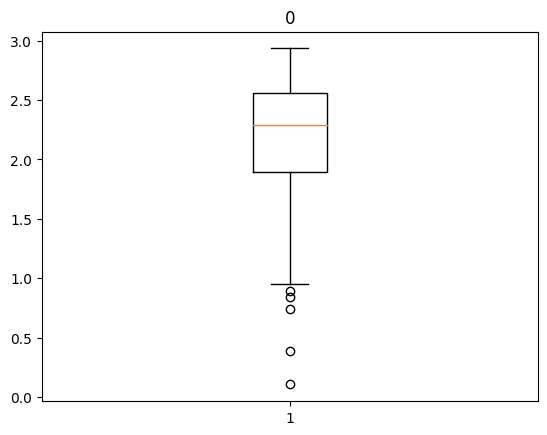

In [ ]:
df = pd.DataFrame(data)

for col in df.columns:
  col_data = df[col].dropna()
  log_data = np.log(col_data)
  plt.boxplot(log_data)
  plt.title(col)
  plt.show()

In [ ]:
org_data.AQI.head()


0    155
1    159
2    173
3    184
4    191
Name: AQI, dtype: int64

In [ ]:
#org_data1=org_data

In [ ]:
org_data2=org_data2.drop(['StationId'],axis=1)

In [ ]:
org_data2= org_data2.rename(columns={'PM2.5': 'PM2_5'})

In [ ]:
org_data2.head()

,StationName,City,State,PM2_5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,date,time
0,5,0,0,104.00,148.5,1.93,23.00,13.75,9.80,0.1,15.30,117.62,0.30,10.40,0.23,155,1,2017-11-25,9
1,5,0,0,94.50,142.0,1.33,16.25,9.75,9.65,0.1,17.00,136.23,0.28,7.10,0.15,159,1,2017-11-25,10
2,5,0,0,82.75,126.5,1.47,14.83,9.07,9.70,0.1,15.40,149.92,0.20,4.55,0.08,173,1,2017-11-25,11
3,5,0,0,79.00,124.0,5.30,21.15,15.53,9.40,0.1,14.21,156.80,0.20,4.00,0.00,184,1,2017-11-25,12
4,5,0,0,68.50,117.0,1.35,13.60,8.35,7.40,0.1,21.80,161.70,0.10,2.30,0.00,191,1,2017-11-25,14


In [ ]:
org_data2=org_data2.drop(['date','time','StationName','City','State','NO','NOx','NH3','CO','O3','Benzene','Toluene','Xylene','AQI_Bucket'],axis=1)

In [ ]:
org_data2.head()

,PM2_5,PM10,NO2,SO2,AQI
0,104.00,148.5,23.00,15.30,155
1,94.50,142.0,16.25,17.00,159
2,82.75,126.5,14.83,15.40,173
3,79.00,124.0,21.15,14.21,184
4,68.50,117.0,13.60,21.80,191


In [ ]:
y=org_data2['AQI']
X = org_data2.drop('AQI', axis=1)


In [ ]:
X.head()

,PM2_5,PM10,NO2,SO2
0,104.00,148.5,23.00,15.30
1,94.50,142.0,16.25,17.00
2,82.75,126.5,14.83,15.40
3,79.00,124.0,21.15,14.21
4,68.50,117.0,13.60,21.80


In [ ]:
X.head()

,PM2_5,PM10,NO2,SO2
0,104.00,148.5,23.00,15.30
1,94.50,142.0,16.25,17.00
2,82.75,126.5,14.83,15.40
3,79.00,124.0,21.15,14.21
4,68.50,117.0,13.60,21.80


In [ ]:
from sklearn import linear_model
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=50)
lr= linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
x_train.head()

,PM2_5,PM10,NO2,SO2
3149,8.50,26.00,6.98,6.70
2018,36.50,87.50,13.15,10.55
1504,66.75,130.25,54.50,7.63
12944,73.50,118.75,16.48,3.00
55749,105.96,44.97,37.36,1.57


In [ ]:
from sklearn.metrics import r2_score
print('MSE=',r2_score(y_test,y_pred))

MSE= 0.527235133411057


In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
scaled_x_train = Scaler.fit_transform(x_train)
scaled_x_test = Scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=50)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.955829017255847


In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.691544299739472


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [ ]:
score.mean()

0.38921496251845067

In [ ]:
#RandomForestRegressor()

In [ ]:
predictions=regressor.predict(x_test)

<ipython-input-104-379d561d0a98>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

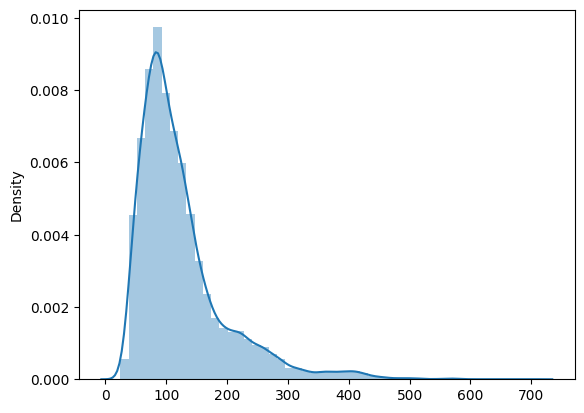

In [ ]:
sns.distplot(predictions)

In [ ]:
# Creating a function for prediction
def predict_function(PM2_5, PM10, NO2, SO2):
    t = float(PM2_5)
    tm = float(PM10)
    tmm = float(NO2)
    slp = float(SO2)
    

    x= [[t, tm, tmm, slp ]]

    return regressor.predict(x)
	

In [ ]:
predictions = predict_function(70, 140, 30, 14)[0]
print('AQI:', predictions)

AQI: 143.56


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



XG booster

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
import xgboost as xgb


In [ ]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9999973236916111


In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9999169895123168


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)
score.mean()

0.999463725975958

In [ ]:
prediction=regressor.predict(X_test)

<ipython-input-79-0e5e279aab22>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='AQI', ylabel='Density'>

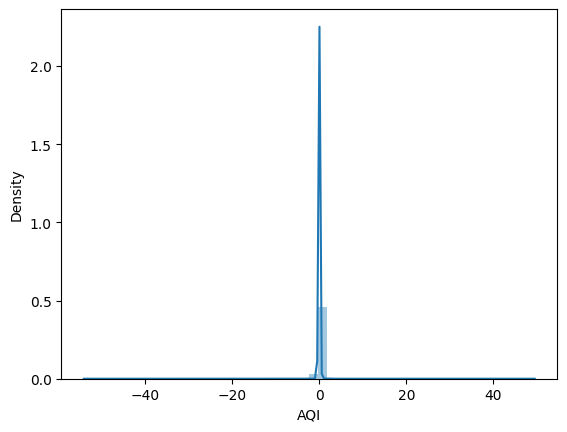

In [ ]:
sns.distplot(y_test-prediction)

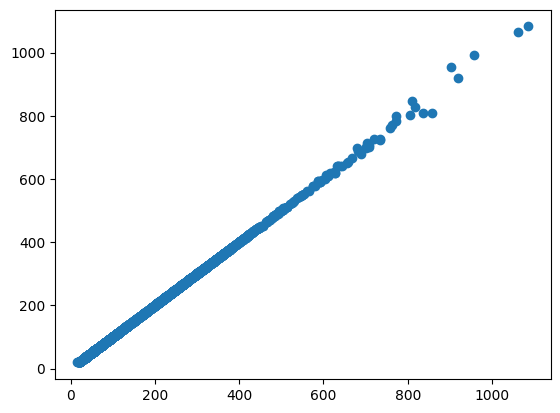

In [ ]:
plt.scatter(y_test,prediction)